<a href="https://colab.research.google.com/github/magedyasse/ML-Topic/blob/main/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

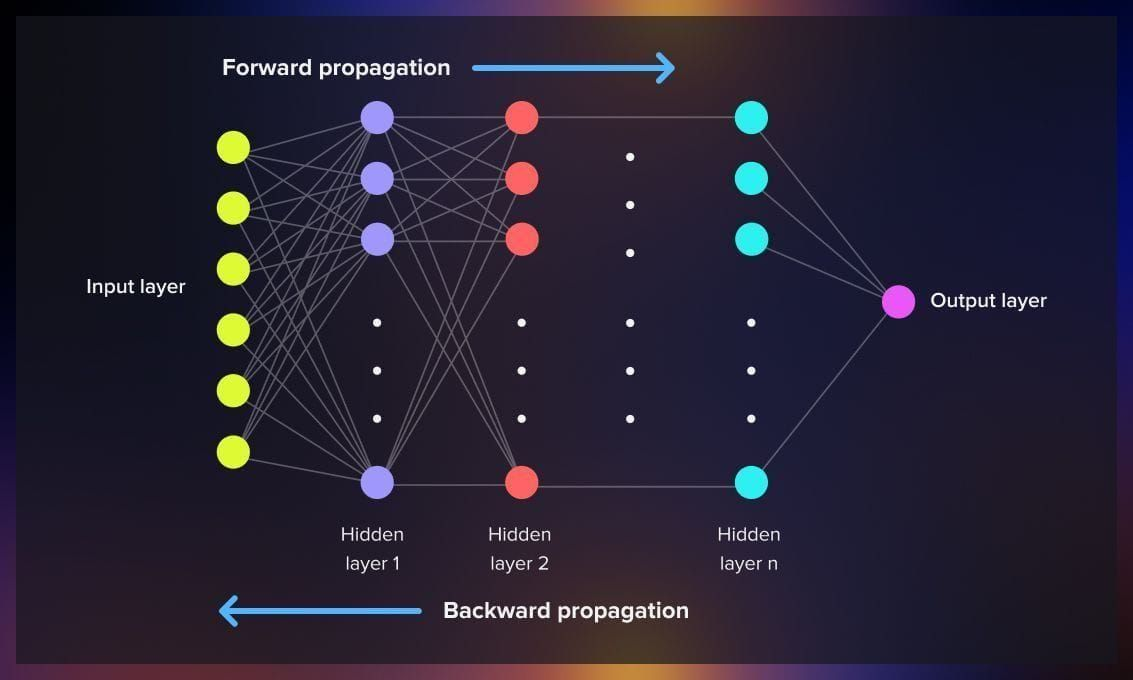

In [24]:
import numpy as np
import pandas as pd

### Activation Functions

## Sigmoid
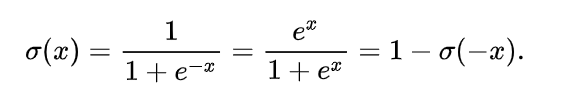

In [25]:
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

# σ'(z) = σ(z) * (1 - σ(z))
def sigmoid_derivative(a):
    """Derivative of the sigmoid function (a is already sigmoid(z))."""
    return a * (1 - a)



### Relu
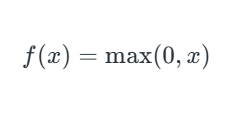

In [26]:
def relu(z):
    return np.maximum(0, z)
    """ReLU activation function."""

# d/dz ReLU(z) = 1 if z > 0 else 0
def relu_derivative(z):
    """Derivative of the ReLU function."""
    return np.where(z > 0, 1, 0)

### Initialize Parameters | 2-layer network


In [27]:
def init_params(n_x, n_h, n_y, seed=42):

    np.random.seed(seed)

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))


    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))


    return W1, b1, W2, b2


## Forward Propagation

### Layer computations:
###   Z1 = W1 X + b1           (W1: n_h x n_x, X: n_x x m, b1 broadcast)
###  A1 = ReLU(Z1)
###   Z2 = W2 A1 + b2
###  A2 = σ(Z2)



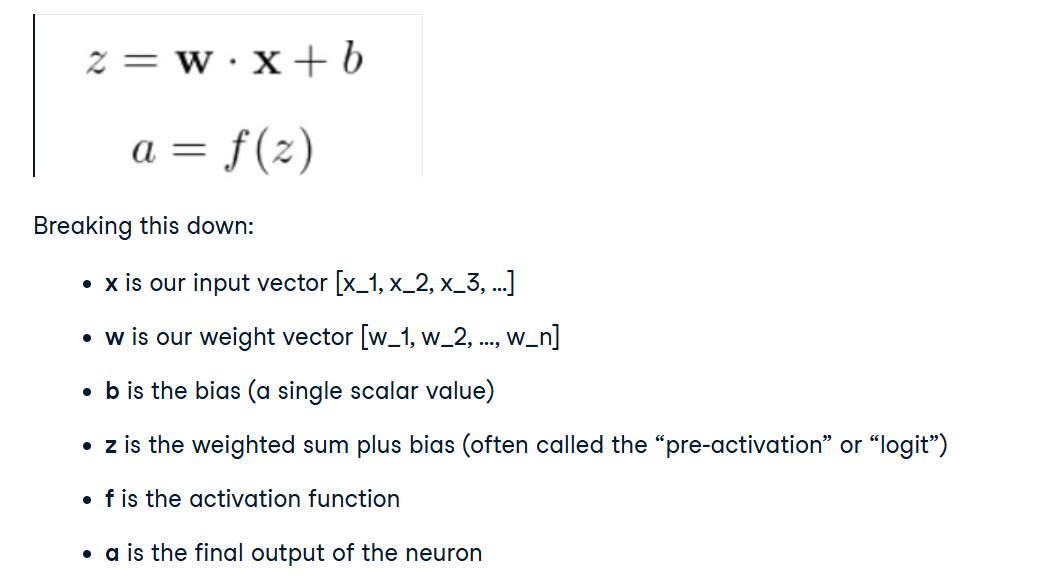

In [28]:
def forward(X, W1, b1, W2, b2):

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    return Z1, A1, Z2, A2

### Loss Function

###  Binary cross-entropy (log loss) for m examples:

###  L = - (1/m) * Σ [ y * log(A2) + (1-y) * log(1-A2) ]

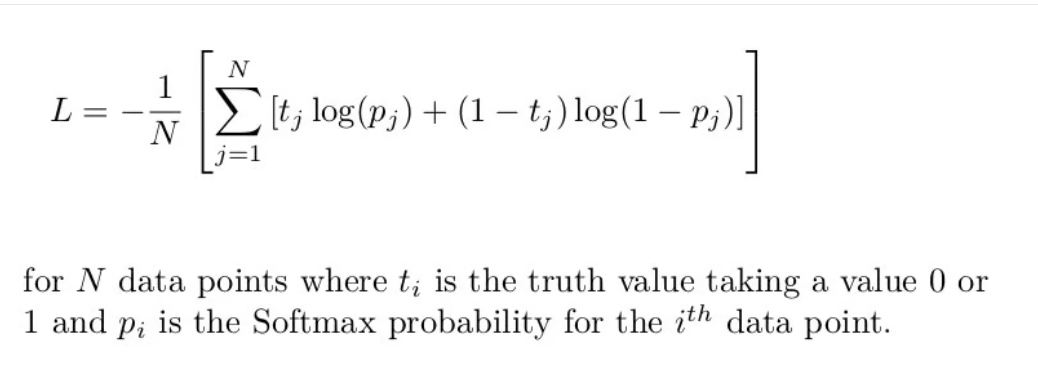




In [29]:
def compute_loss(y, A2, eps=1e-8):
    m = y.shape[1]
    loss = - (1.0 / m) * np.sum(y * np.log(A2 + eps) + (1 - y) * np.log(1 - A2 + eps))
    return float(np.squeeze(loss))


## Backward Propagation

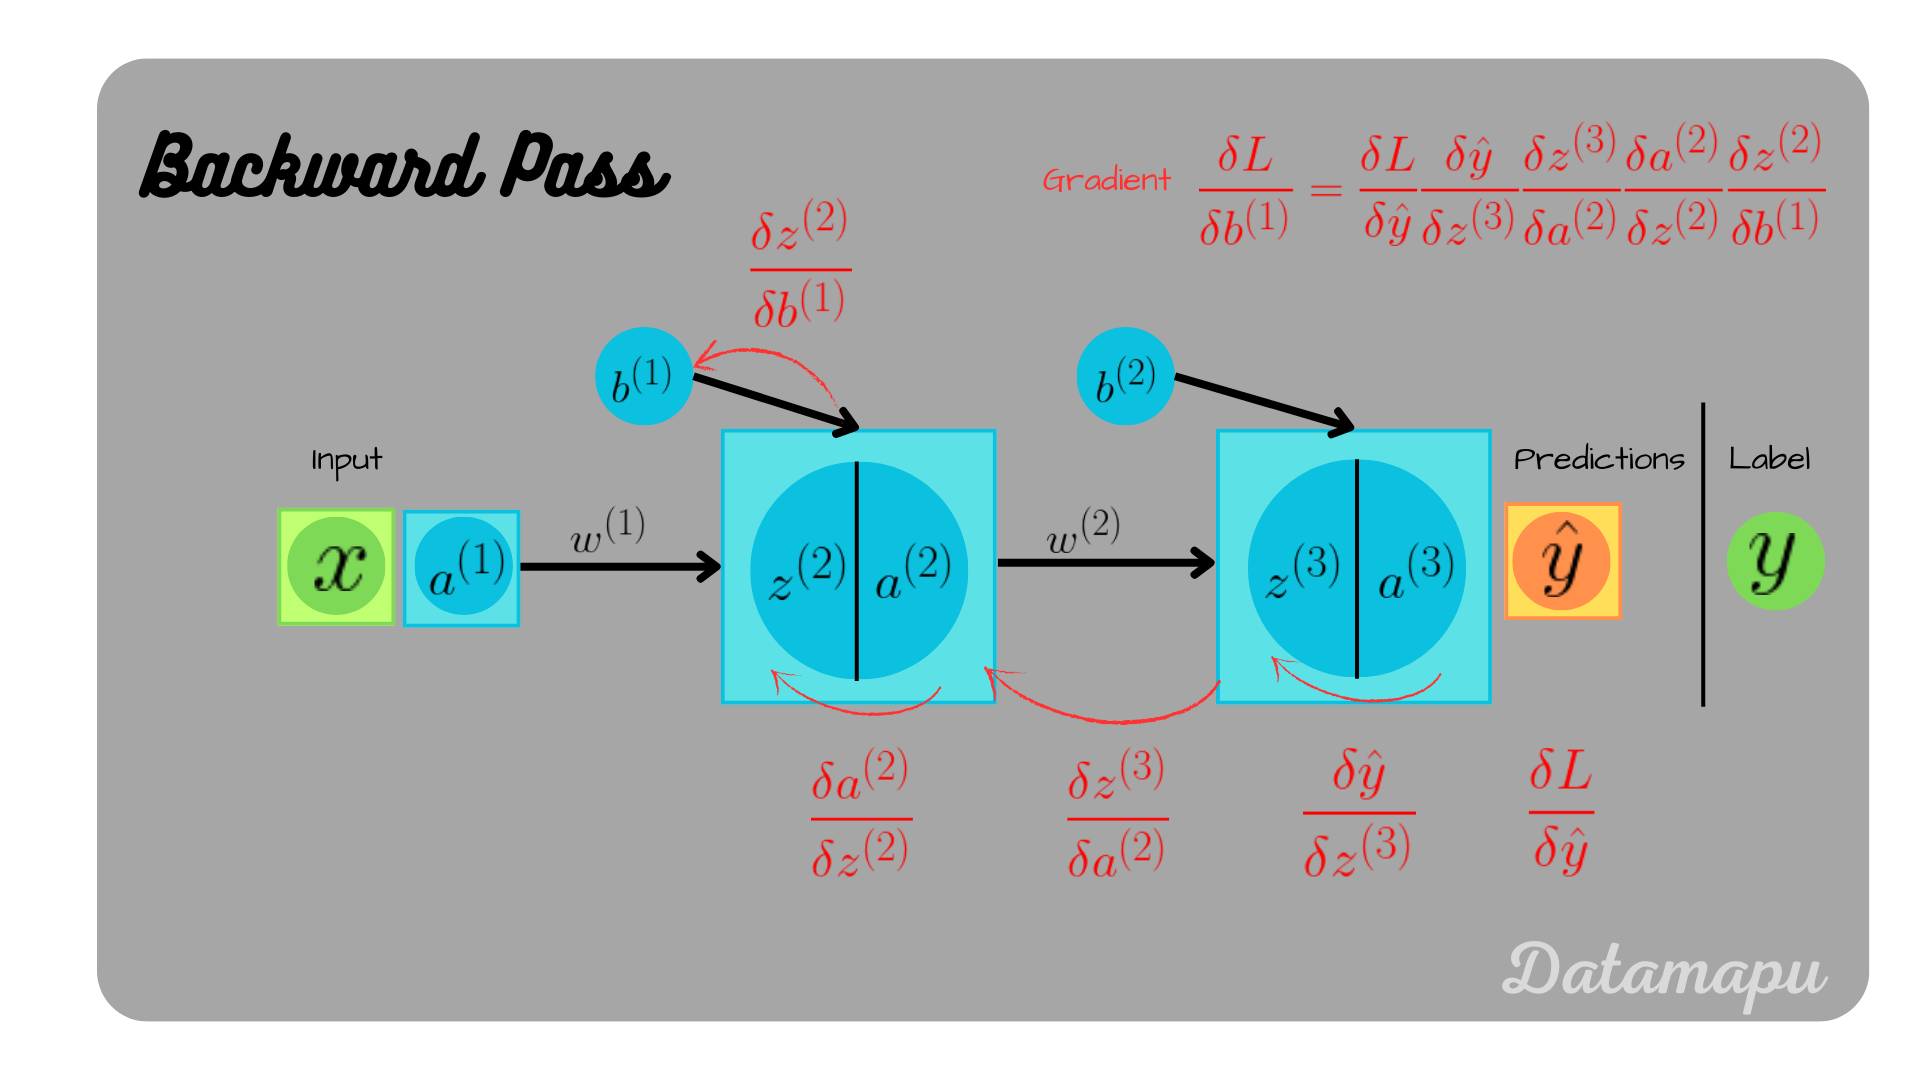






In [30]:
def backward(X, y, Z1, A1, A2, W2):
    m = X.shape[1]  # number of training examples

    # Output layer error
    dZ2 = A2 - y  # difference between predicted and actual values
    dW2 = (1.0 / m) * np.dot(dZ2, A1.T)  # gradient for W2
    db2 = (1.0 / m) * np.sum(dZ2, axis=1, keepdims=True)  # gradient for b2

    # Hidden layer error
    dA1 = np.dot(W2.T, dZ2)  # error propagated to hidden layer activations
    dZ1 = dA1 * relu_derivative(Z1)  # apply derivative of ReLU
    dW1 = (1.0 / m) * np.dot(dZ1, X.T)  # gradient for W1
    db1 = (1.0 / m) * np.sum(dZ1, axis=1, keepdims=True)  # gradient for b1

    return dW1, db1, dW2, db2  # return all gradients



## Gradient descent update:
###   W := W - lr * dW
###   b := b - lr * db

In [31]:

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1
    W2 = W2 - lr * dW2
    b2 = b2 - lr * db2
    return W1, b1, W2, b2

In [33]:
if __name__ == "__main__":

    X = np.array([[0, 0, 1, 1],
                  [0, 1, 0, 1]], dtype=float)

    y = np.array([[0, 1, 1, 0]], dtype=float)

    n_x = X.shape[0]
    n_h = 4
    n_y = 1

    W1, b1, W2, b2 = init_params(n_x, n_h, n_y)
    epochs = 10000
    lr = 0.1


    for i in range(epochs):

        # Forward pass
        Z1, A1, Z2, A2 = forward(X, W1, b1, W2, b2)

        # Loss
        loss = compute_loss(y, A2)

        # Accuracy
        predictions = (A2 > 0.5).astype(int)  # threshold at 0.5
        acc = np.mean(predictions == y) * 100  # percentage

        # Backward pass
        dW1, db1, dW2, db2 = backward(X, y, Z1, A1, A2, W2)

        # Update parameters
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)

        # Logging every 1000 epochs
        if i % 1000 == 0:
            print(f"Epoch {i}, Loss = {loss:.6f}, Accuracy = {acc:.2f}%")


Epoch 0, Loss = 0.693148, Accuracy = 75.00%
Epoch 1000, Loss = 0.499046, Accuracy = 75.00%
Epoch 2000, Loss = 0.044741, Accuracy = 100.00%
Epoch 3000, Loss = 0.015452, Accuracy = 100.00%
Epoch 4000, Loss = 0.008876, Accuracy = 100.00%
Epoch 5000, Loss = 0.006124, Accuracy = 100.00%
Epoch 6000, Loss = 0.004638, Accuracy = 100.00%
Epoch 7000, Loss = 0.003713, Accuracy = 100.00%
Epoch 8000, Loss = 0.003088, Accuracy = 100.00%
Epoch 9000, Loss = 0.002637, Accuracy = 100.00%
